In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imageio import imread
import sys

sys.path.insert(0, "../src/")
sys.path.insert(0, "../../project_1/src")
from NeuralNetwork import *
from CostFunctions import *
from ActivationFunctions import *
from SGD import *
from sklearn.model_selection import train_test_split
from FrankeFunction import *
from linear_regression import *
from stat_tools import *

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("X shape = ", X.shape)
print("y shape = ", y.shape)

# Rescale the X data from [0, 255] -> [0, 1]
# NOTE: Re-Scaling brought the score from ~93 -> ~96 for a 30 layer ReLU
X /= 255.0
np.max(X)

X shape =  (70000, 784)
y shape =  (70000,)


1.0

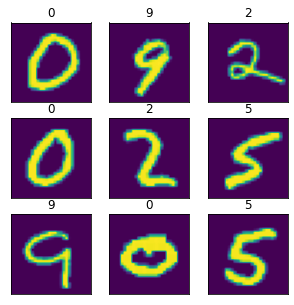

In [3]:
plt.figure(figsize = (5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    pick = np.random.randint(len(X)-1)
    plt.imshow(X[pick].reshape(28, 28))
    plt.title(f"{y[pick]}")
    plt.xticks([]); plt.yticks([])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000,)


In [5]:
FFNN = FFNNClassifier(
    X=X_train,
    Y=y_train,
    cost=CostFunctions.CrossEntropy,
    activation=ActivationFunctions.ID,
    activation_out=ActivationFunctions.Softmax,
    network_shape=[30]
)

In [6]:
FFNN.train(int(len(y_train) / 32), 0.01, 100)

../src/NeuralNetwork.py:251: RuntimeWarning: overflow encountered in matmul
  self.z[-1] = self.a[-2] @ self.weights[-1].T + self.biases[-1]
../src/NeuralNetwork.py:251: RuntimeWarning: invalid value encountered in matmul
  self.z[-1] = self.a[-2] @ self.weights[-1].T + self.biases[-1]
../src/NeuralNetwork.py:266: RuntimeWarning: invalid value encountered in matmul
  self.error[l] = (self.error[l + 1] @ self.weights[l + 1]) * self.activation.evaluate_derivative(
../src/NeuralNetwork.py:275: RuntimeWarning: invalid value encountered in matmul
  self.cost_weight_gradient[l] = self.error[l].T @ self.a[l - 1]


In [7]:
FFNN.score(y_test, X_test)

0.1

In [8]:
SKL_NN = MLPClassifier(
    hidden_layer_sizes = [30],
    activation = "identity",
    solver='sgd',
    batch_size = 32,
    learning_rate_init = 0.01,
    alpha = 0,
    momentum = 0,
    max_iter = 100
)
SKL_NN.fit(X_train, y_train)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='identity', alpha=0, batch_size=32,
              hidden_layer_sizes=[30], learning_rate_init=0.01, max_iter=100,
              momentum=0, solver='sgd')

In [9]:
SKL_NN.score(X_test, y_test)

0.9235714285714286

In [10]:
SKL_NN.out_activation_

'softmax'

In [11]:
print(SKL_NN.n_iter_)

100


In [12]:
class a:
    def __init__(self):
        pass
    
    def hello(self):
        print("hello, i'm A")
        
    def say(self):
        self.hello()
    
class b(a):
    def hello(self):
        print("Hello, i'm B")
    
        
A = a()
A.say()
B = b()
B.say()

hello, i'm A
Hello, i'm B


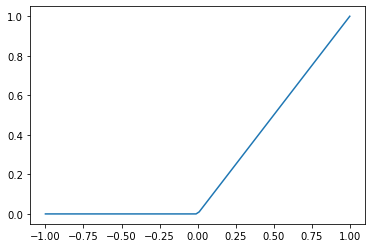

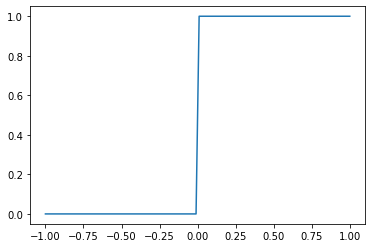

In [13]:
a = ActivationFunctions.ReLU
x = np.linspace(-1, 1, 100)
plt.plot(x, a.evaluate(x))
plt.show()
plt.plot(x, a.evaluate_derivative(x))

In [14]:
b = np.random.randn(5, 3)
b

array([[ 0.47525533,  0.29303261, -0.85579095],
       [-0.11882653, -0.13527335, -1.61547261],
       [ 0.19570183,  0.18135514, -1.00066268],
       [ 0.04899534,  0.48386141,  1.39274472],
       [ 0.23022025,  1.23763119, -1.649027  ]])

In [15]:
a.evaluate(b)

array([[0.47525533, 0.29303261, 0.        ],
       [0.        , 0.        , 0.        ],
       [0.19570183, 0.18135514, 0.        ],
       [0.04899534, 0.48386141, 1.39274472],
       [0.23022025, 1.23763119, 0.        ]])